Is it a bird? (FastAI Deep learning part 1 course)

IMPORTS

In [1]:
import socket, warnings
from time import sleep
from duckduckgo_search import DDGS
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *
#import pandas as pd
#import numpy as np
#from sklearn.ensemble import RandomForestRegressor

In [28]:
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET,socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Set 'Internet' switch to on")


In [29]:
def search_images(term,max_images=30):
    print(f"Searching for '{term}'")
    return L(DDGS().images(keywords=term,max_results=max_images)).itemgot('image')

In [30]:
urls = search_images('bird photos',max_images=1)
urls[0]

Searching for 'bird photos'


'https://images.alphacoders.com/492/492674.jpg'

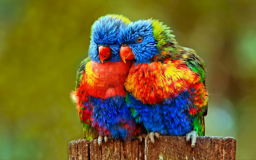

In [31]:
dest = "./../../Datasets/FastAI/bird.jpg"
download_url(urls[0],dest,show_progress=False)
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'forest photos'


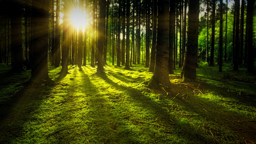

In [32]:
dest = "./../../Datasets/FastAI/forest.jpg"
download_url(search_images('forest photos',max_images=1)[0],dest=dest,show_progress=False)
Image.open(dest).to_thumb(256,256)

In [3]:
searches = 'forest', 'bird'
path = Path('./../../Datasets/FastAI/bird_or_not')

In [33]:
for st in searches:
    dest = (path/st)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest,urls=search_images(f'{st} photo'))
    sleep(10)
    download_images(dest,urls=search_images(f'{st} sun photo'))
    sleep(10)
    download_images(dest,urls=search_images(f'{st} shade photo'))
    sleep(10)
    resize_image(path/st,max_size=400,dest=path/st)

Searching for 'forest photo'
Searching for 'forest sun photo'
Searching for 'forest shade photo'
Searching for 'bird photo'
Searching for 'bird sun photo'
Searching for 'bird shade photo'


In [4]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

In [5]:
dls = DataBlock(blocks=(ImageBlock, CategoryBlock),
get_items=get_image_files,
splitter=RandomSplitter(valid_pct=0.2,seed=42),
get_y=parent_label,
item_tfms=[Resize(192,method='squish')]).dataloaders(path,bs=32)

dls.show_batch(max_n=6)

/Users/vc/.virtualenvs/fastai_env/lib/python3.11/site-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


Could not do one pass in your dataloader, there is something wrong in it. Please see the stack trace below:


RuntimeError: The MPS backend is supported on MacOS 12.3+.Current OS version can be queried using `sw_vers`

In [25]:
??DataBlock

Init signature:
DataBlock(
    blocks: 'list' = None,
    dl_type: 'TfmdDL' = None,
    getters: 'list' = None,
    n_inp: 'int' = None,
    item_tfms: 'list' = None,
    batch_tfms: 'list' = None,
    *,
    get_items=None,
    splitter=None,
    get_y=None,
    get_x=None,
)
Source:        
@docs
@funcs_kwargs
class DataBlock():
    "Generic container to quickly build `Datasets` and `DataLoaders`."
    get_x=get_items=splitter=get_y = None
    blocks,dl_type = (TransformBlock,TransformBlock),TfmdDL
    _methods = 'get_items splitter get_y get_x'.split()
    _msg = "If you wanted to compose several transforms in your getter don't forget to wrap them in a `Pipeline`."
    def __init__(self, 
        blocks:list=None, # One or more `TransformBlock`s
        dl_type:TfmdDL=None, # Task specific `TfmdDL`, defaults to `block`'s dl_type or`TfmdDL`
        getters:list=None, # Getter functions applied to results of `get_items`
        n_inp:int=None, # Number of inputs
        item_tfms:list